In [9]:
!pip install nltk
!pip install gensim
!pip install keras

In [51]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [12]:
import os

In [13]:
tweet= pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
tweet.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [14]:
print('There are {} rows and {} columns in train'.format(tweet.shape[0],tweet.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in train


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

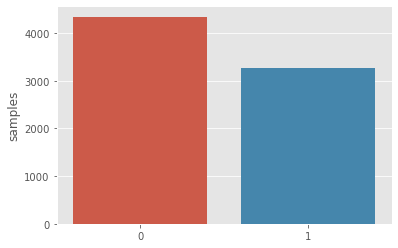

In [15]:
x=tweet.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

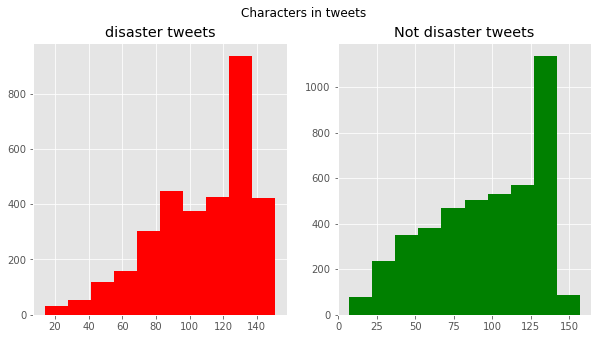

In [16]:
#Number of characters in tweets

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

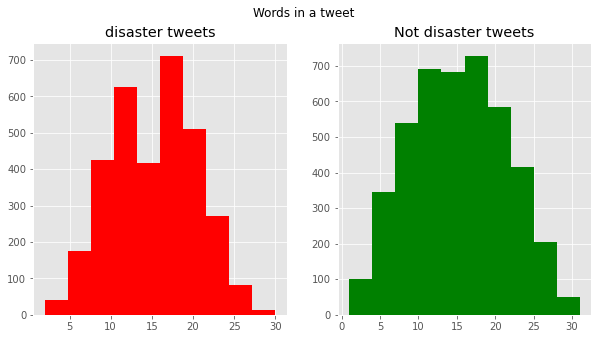

In [17]:
#Number of words in a tweet

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

In [21]:
corpus=[]
    
for x in tweet[tweet['target']==1]['text'].head(3).str.split():
    print(x)
    for i in x:
        corpus.append(i)

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']
['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada']
['All', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'are', 'being', 'notified', 'by', 'officers.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']


In [22]:
corpus

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all',
 'Forest',
 'fire',
 'near',
 'La',
 'Ronge',
 'Sask.',
 'Canada',
 'All',
 'residents',
 'asked',
 'to',
 "'shelter",
 'in',
 "place'",
 'are',
 'being',
 'notified',
 'by',
 'officers.',
 'No',
 'other',
 'evacuation',
 'or',
 'shelter',
 'in',
 'place',
 'orders',
 'are',
 'expected']

In [23]:
def create_corpus(target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [24]:
# Common stopwords in tweets

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

In [25]:
top

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442)]

<BarContainer object of 10 artists>

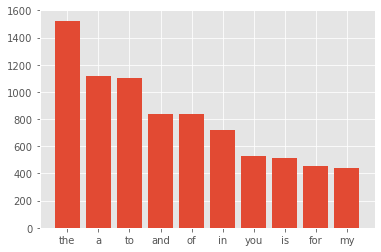

In [26]:
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

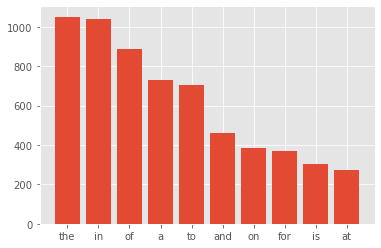

In [27]:
# analyze tweets with class 1

corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 18 artists>

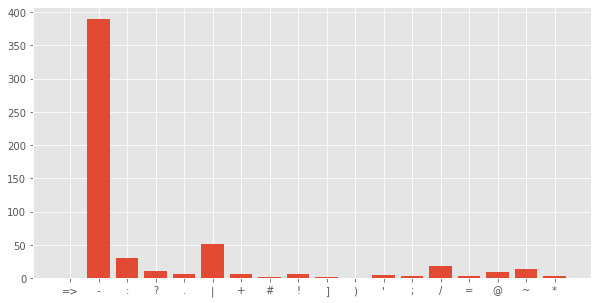

In [28]:
# Analyzing punctuations with class 1

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 20 artists>

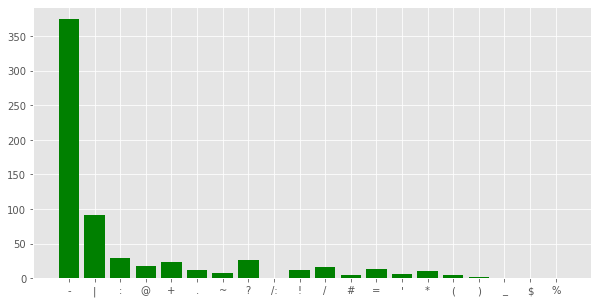

In [29]:
# Analyzing punctuations with class 0


plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')


In [30]:
# Common words ?

counter=Counter(corpus)
most=counter.most_common()

<AxesSubplot:>

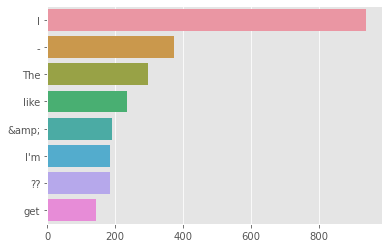

In [32]:
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## Data Cleaning

In [33]:
df=pd.concat([tweet,test])
df.shape

(10876, 5)

In [35]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [36]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [37]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [38]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [39]:
### Removing HTML tags

example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [40]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [41]:
df['text']=df['text'].apply(lambda x : remove_html(x))

In [42]:
## Romoving Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [43]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [44]:
## Removing punctuations

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [45]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

In [46]:
# Spelling Correction

!pip install pyspellchecker

     |████████████████████████████████| 1.9 MB 707 kB/s eta 0:00:01     |████▎                           | 256 kB 707 kB/s eta 0:00:03     |███████████████████▍            | 1.2 MB 707 kB/s eta 0:00:02


In [47]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correct_spellings(text)


'correct me please'

## GloVe for Vectorization

In [48]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [49]:
tqdm(df['text'])

  0%|          | 0/10876 [00:00<?, ?it/s]

  0%|          | 0/10876 [00:00<?, ?it/s]

In [52]:
corpus=create_corpus(df.head(3))


100%|██████████| 3/3 [00:00<00:00, 128.90it/s]


In [53]:
corpus

[['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['all',
  'residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  'no',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected']]

In [54]:
corpus=create_corpus(df)


100%|██████████| 10876/10876 [00:07<00:00, 1399.03it/s]


In [55]:
corpus

[['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['all',
  'residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  'no',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'],
 ['just',
  'got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school'],
 ['rockyfire',
  'update',
  'california',
  'hwy',
  'closed',
  'directions',
  'due',
  'lake',
  'county',
  'fire',
  'cafire',
  'wildfires'],
 ['flood',
  'disaster',
  'heavy',
  'rain',
  'causes',
  'flash',
  'flooding',
  'streets',
  'manitou',
  'colorado',
  'springs',
  'areas'],
 ['im', 'top', 'hill', 'i', 'see', 'fire', 'woods'],
 ['theres',
  'emergency',
  'evacuation',
  'happening',
  'building',
  'across',
  'street'],
 ['im', 'afraid', 'tornado', 'coming', 'area'],
 ['three', 'people

## GloVe for Vectorization

In [59]:
embedding_dict={}

with open('glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors

f.close()

In [61]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

In [63]:
sequences=tokenizer_obj.texts_to_sequences(corpus)

In [65]:
tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [66]:
tweet_pad

array([[ 622, 5467,  738, ...,    0,    0,    0],
       [  96,    7,  138, ...,    0,    0,    0],
       [ 119, 1469, 1386, ...,    0,    0,    0],
       ...,
       [ 749,  478,  348, ...,    0,    0,    0],
       [4085,  536,  372, ...,    0,    0,    0],
       [3997, 2557, 1462, ...,    0,    0,    0]], dtype=int32)

In [86]:
tweet_pad.shape

(10876, 50)

In [67]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 20342


In [75]:
j = 0 

for i in word_index:
    if j < 20:
        print(i,word_index[i])
        j+=1
    else: break

i 1
the 2
like 3
amp 4
im 5
a 6
fire 7
get 8
new 9
via 10
news 11
people 12
one 13
in 14
dont 15
us 16
emergency 17
video 18
disaster 19
would 20


In [76]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

In [79]:
for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec


100%|██████████| 20342/20342 [00:00<00:00, 157224.76it/s]


In [80]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.046539  ,  0.61966002,  0.56647003, ..., -0.37616   ,
        -0.032502  ,  0.80620003],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [ 0.75546998,  1.03649998,  0.10213   , ..., -0.17502999,
        -0.13342001,  0.14582001],
       [ 0.03458   , -0.48119   ,  0.67565   , ..., -0.42317   ,
         0.49230999, -0.20338   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [81]:
embedding_matrix.shape

(20343, 100)

## Baseline Model

In [82]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           2034300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 2,076,605
Trainable params: 42,305
Non-trainable params: 2,034,300
_________________________________________________________________


In [84]:
train=tweet_pad[:tweet.shape[0]]
test=tweet_pad[tweet.shape[0]:]

In [85]:
train

array([[ 622, 5467,  738, ...,    0,    0,    0],
       [  96,    7,  138, ...,    0,    0,    0],
       [ 119, 1469, 1386, ...,    0,    0,    0],
       ...,
       [ 396,  462, 1459, ...,    0,    0,    0],
       [  23, 1128, 3820, ...,    0,    0,    0],
       [   2,  147,   82, ...,    0,    0,    0]], dtype=int32)

In [87]:
print(train.shape)
print(test.shape)

(7613, 50)
(3263, 50)


In [88]:
X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [89]:
num_words

20343

In [90]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Epoch 1/15
1618/1618 - 166s - loss: 0.6907 - accuracy: 0.5668 - val_loss: 0.6830 - val_accuracy: 0.5832
Epoch 2/15
1618/1618 - 115s - loss: 0.6019 - accuracy: 0.6832 - val_loss: 0.5256 - val_accuracy: 0.7697
Epoch 3/15
1618/1618 - 112s - loss: 0.5344 - accuracy: 0.7486 - val_loss: 0.5044 - val_accuracy: 0.7767
Epoch 4/15
1618/1618 - 156s - loss: 0.5173 - accuracy: 0.7617 - val_loss: 0.4932 - val_accuracy: 0.7820
Epoch 5/15
1618/1618 - 117s - loss: 0.5100 - accuracy: 0.7628 - val_loss: 0.4862 - val_accuracy: 0.7933
Epoch 6/15
1618/1618 - 114s - loss: 0.5006 - accuracy: 0.7739 - val_loss: 0.4813 - val_accuracy: 0.7951
Epoch 7/15
1618/1618 - 110s - loss: 0.4914 - accuracy: 0.7762 - val_loss: 0.4800 - val_accuracy: 0.7977
Epoch 8/15
1618/1618 - 144s - loss: 0.4881 - accuracy: 0.7804 - val_loss: 0.4780 - val_accuracy: 0.7977
Epoch 9/15
1618/1618 - 140s - loss: 0.4845 - accuracy: 0.7807 - val_loss: 0.4738 - val_accuracy: 0.8004
Epoch 10/15
1618/1618 - 129s - loss: 0.4849 - accuracy: 0.7767 -

In [91]:
sample_sub=pd.read_csv('sample_submission.csv')

In [92]:
sample_sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [93]:
y_pre=model.predict(test)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission.csv',index=False)

In [94]:
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
